# Is the Grass Wet?

This is an example used by Pearl in his book 'Causality'. I've used the conditional probability tables from here:

https://en.wikipedia.org/wiki/Bayesian_network



In [1]:
from import_helper import *
from causalinfo import *
# You only need this if you want to draw pretty pictures of the Networksa
from nxpd import draw, nxpdParams
nxpdParams['show'] = 'ipynb'

In [2]:
rain = Variable('Rain', 2)
sprinkler = Variable('Sprinkler', 2)
grass = Variable('Grass', 2)

In [3]:
def rain_to_sprinkler(r, dist):
    table = [.6, .4], [.99, .01]
    dist[:] = table[r]

In [4]:
eq1 = Equation('RtoS', [rain], [sprinkler], rain_to_sprinkler)

In [5]:
eq1

RtoS 
 
 
 Output 
 Sprinkler 
 
 
 State 
 0 
 1 
 
 
 Rain 
 
 
 
 
 
 
 0 
 0.60 
 0.40 
 
 
 1 
 0.99 
 0.01

In [35]:
def rain_and_sprinkler_to_grass(s, r, dist):
    actual = [[1.0, 0.0], [0.2, 0.8]], [[0.1, 0.9], [0.01, 0.99]]
    dist[:] = actual[s][r]

In [7]:
eq2 = Equation('SRtoG', [sprinkler, rain], [grass], rain_and_sprinkler_to_grass)

In [37]:
eq2

In [38]:
gr = CausalGraph([eq1, eq2])

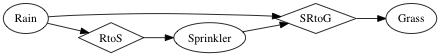

In [10]:
draw(gr.full_network)

In [11]:
rain_prob = JointDist({rain: [.8, .2]})
rain_prob

,Pr
Rain,
0,0.8
1,0.2


In [19]:
joint = gr.generate_joint(rain_prob)
joint

Pr 
 
 
 Sprinkler 
 Rain 
 Grass 
 
 
 
 
 
 0 
 0 
 0 
 0.48000 
 
 
 1 
 0 
 0.03960 
 
 
 1 
 0.15840 
 
 
 1 
 0 
 0 
 0.03200 
 
 
 1 
 0.28800 
 
 
 1 
 0 
 0.00002 
 
 
 1 
 0.00198

In [26]:
joint.query_probability('Grass==1 and Sprinkler==1')

0.28998

In [70]:
grass_wet = gr.generate_joint(rain_prob, JointDistByState({sprinkler:1}))

In [74]:
grass_wet.joint(grass)

,Pr
Grass,
0,0.082
1,0.918


In [31]:
joint.joint(rain, grass)

Pr 
 
 
 Rain 
 Grass 
 
 
 
 
 
 0 
 0 
 0.51200 
 
 
 1 
 0.28800 
 
 
 1 
 0 
 0.03962 
 
 
 1 
 0.16038